In [1]:
import pandas as pd
trainOriginal = pd.read_csv('train.csv')

In [3]:
train = trainOriginal
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
# Concateno todos los tuits.
allWords = ''
for text in train.text:
    allWords += ' ' + text.lower()

In [24]:
import re
regex = re.compile('\#\w+', re.IGNORECASE)
hashtags = pd.Series(re.findall(regex, allWords)).value_counts().head(20).reset_index()
hashtags.columns = ['hashtag', 'cantTuits']
hashtags = hashtags.sort_values(by='cantTuits')
hashtags

,hashtag,cantTuits
19,#sismo,10
17,#india,10
16,#bbc,10
18,#yyc,10
15,#japan,11
14,#hiring,11
13,#world,11
12,#terrorism,11
11,#job,12
10,#isis,12


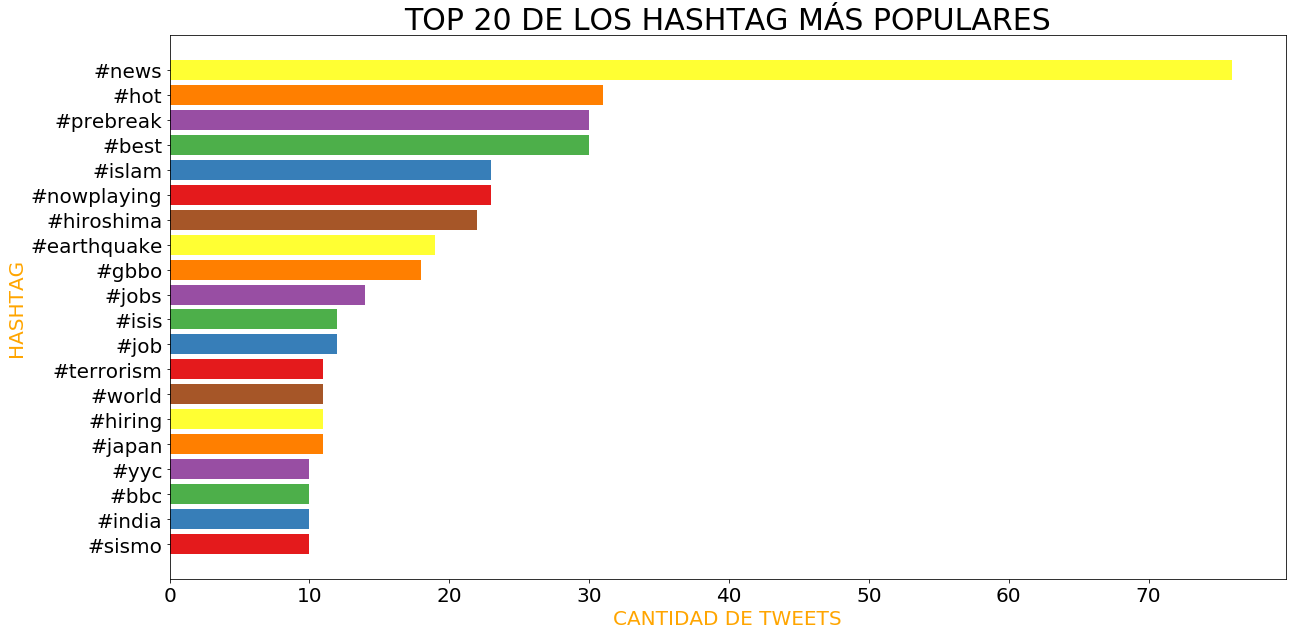

In [96]:
import matplotlib.pyplot as plt
palette = plt.get_cmap('Set1')
colors = []
for index, hashtag in enumerate(hashtags.hashtag):
    colors.append(palette(index % 7))  
plt.barh(hashtags.hashtag, hashtags.cantTuits, color=colors)
plt.title("TOP 20 DE LOS HASHTAG MÁS POPULARES", loc='center', fontsize=30, fontweight=0, color='black')
plt.xlabel("CANTIDAD DE TWEETS", color='orange')
plt.ylabel("HASHTAG", color='orange')
plt.rcParams["figure.figsize"] = [0, 0]
plt.rcParams["figure.figsize"] = [20, 10]
plt.rcParams["font.size"] = 30

El hashtag no es más que una manera de etiquetar o clasificar los mensajes de Twitter, por lo que se pueden agrupar los tweets en torno a un mismo tema. Cuando se hace clic sobre un hashtag, se verán otros tweets que contienen el mismo hashtag. Esto quiere decir que están hablando del mismo tema. 
En el gráfico se puede observar que el hashtag #news ('noticias' en inglés) es el más popular entre los usuarios que incluyen hashtags en sus tweets.
También se puede ver que hay varios relacionados entre sí, como por ejemplo #isis y #terrorism. Otros hashtags que se pueden relacionar son #hiroshima con #japan, #earthquake con #sismo y #job, #jobs con #hiring, estos últimos se pueden utilizar para ofrecer y/o conseguir trabajo.